In [2]:
import pandas as pd
import numpy as ny
import plotly.express as px
import seaborn as sns


In [3]:
df= pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [37]:
frequency_table=df["category"].value_counts(ascending=False)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [6]:
frequency_table=df["category"].value_counts(ascending=False)
top_5_frequency_table = frequency_table.head(5)
top_5_frequency_table



category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## extra

In [68]:
# pd.set_option('display.max_rows' , 1000)
# display(pd.DataFrame(df['category'].value_counts()))
# pd.set_option('display.max_rows', None)


Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

In [7]:
top_5_frequency_table = top_5_frequency_table.reset_index()
top_5_frequency_table


,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [64]:
top_5_frequency_table['normalized'] = top_5_frequency_table['count'] / top_5_frequency_table['count'].sum()

In [66]:
top_5_frequency_table['normalized'].round(2)

0    0.92
1    0.02
2    0.02
3    0.02
4    0.02
Name: normalized, dtype: float64

In [67]:
fig = px.pie(top_5_frequency_table, values='normalized', names='category',
             title='Proportions of Top 5 Categories')

# Display the pie chart
fig.show()

In [8]:
fig = px.bar(top_5_frequency_table, x='category', y='count', title='Category Value Counts')

# Show the plot
fig.show()


How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Calculate the mean, median, and mode for the price of products.


In [9]:
mean_price = df['price'].mean().round(2)
mean_price


89.24

In [10]:
mode_price = df['price'].mode()
mode_price

0    9.99
Name: price, dtype: float64

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
df['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [50]:
variance_price = df['price'].var()
variance_price

119445.4853225653

In [53]:

std_price = df['price'].std()
std_price

345.6088617535223

In [55]:
min_price = df['price'].min()
min_price

0.0

In [57]:
max_price = df['price'].max()
max_price

100000.0

In [60]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)


In [63]:
diff = q3-q1
diff

# 50% of the products quantile 1 and quantile 3

36.0

<Axes: ylabel='price'>

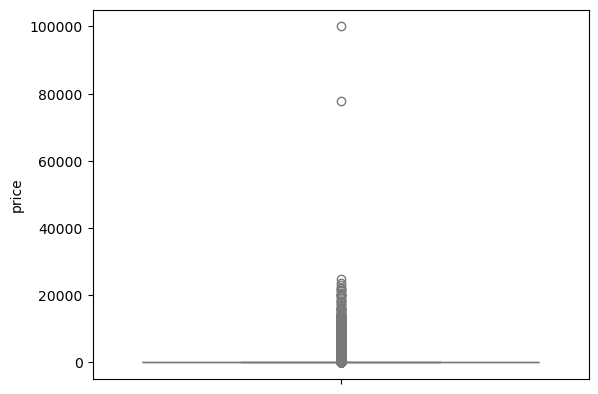

In [45]:
sns.boxplot(data = df['price'], color="lightblue")

How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
Calculate the mean, median, and mode for the rating of products.

In [13]:
average_rating = df["stars"].mean().round(2)
average_rating

2.15

In [14]:
meadian_rating = df["stars"].median()
meadian_rating

0.0

In [15]:
most_rating = df["stars"].mode().round(2)
most_rating

0    0.0
Name: stars, dtype: float64

 How do customers generally rate products? Is there a common trend?

In [16]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [25]:
variance_rating = df['stars'].var()
variance_rating


4.81743402976196

In [27]:
std_dev_rating = df['stars'].std()
std_dev_rating


2.1948653785054697

In [28]:
min_rating = df['stars'].min()
min_rating


0.0

In [29]:
max_rating = df['stars'].max()
max_rating

5.0

In [30]:
range_rating = max_rating- min_rating
range_rating

5.0

In [31]:
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])
quantiles_rating

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [36]:
skewness_rating = df['stars'].skew()
skewness_rating

0.08120735761080985

In [69]:
kurtosis_rating = df['stars'].kurtosis()
kurtosis_rating

-1.9260061280432985

 With a skewness of 0.08, the data is nearly symmetrical. There is a very slight positive skew, but it's minimal. This means that the tail on the right side (higher rating) is longer than the left side (lower rating). 

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

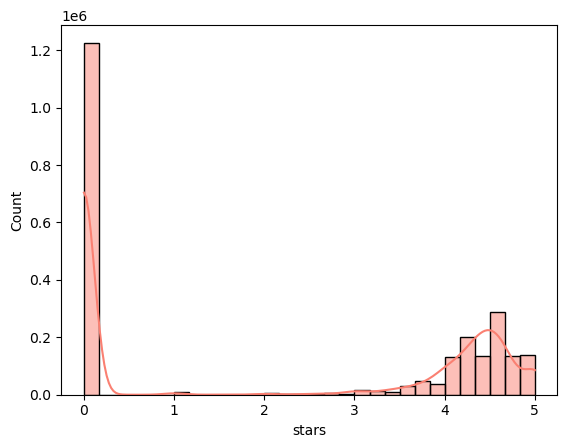

In [34]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

This shows that ratings are not consistentent, there's a high count with 0 rating- not happy, missing values replaced by 0
4 or 5 stars are more common


/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_99083/4279665227.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='stars', ylabel='Density'>

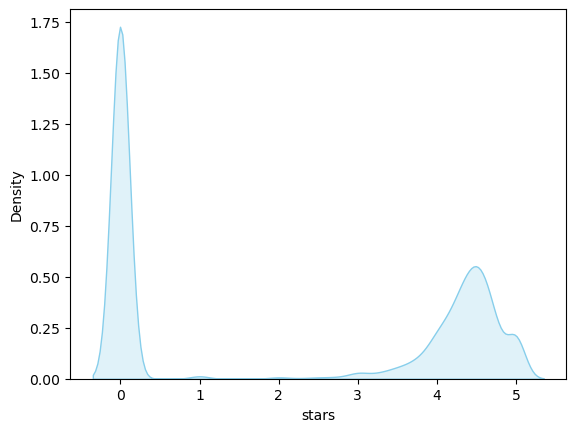

In [76]:
sns.kdeplot(data = df['stars'], color="skyblue", shade =  True)